https://financedata.github.io/posts/finance-data-reader-users-guide.html

In [1]:
#pip install -U finance-datareader
#pip install pandas-datareader
import pandas_datareader as wb
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

pd.set_option('precision', 4)  # 소숫점 4째자리까지 표현

start = datetime.datetime(2018,1,1)   #시작일
end = datetime.datetime(2020, 5, 22)  #종료일

C:\Anaconda3_19_1222\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


#####  한국거래소 상장종목 전체의 데이터프레임 생성


In [2]:
df_krx = fdr.StockListing('KRX')
df_krx = df_krx[['Symbol', 'Market', 'Name','Sector']]

df_krx.head()

,Symbol,Market,Name,Sector
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업
2,006840,KOSPI,AK홀딩스,기타 금융업
3,054620,KOSDAQ,APS홀딩스,기타 금융업
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업


##### 한국거래소 데이터프레임으로 코스피 데이터프레임 , 코스닥 데이터프레임 생성

In [3]:
한국거래소 상장종목 전체
kospi_df = df_krx[df_krx['Market'] == 'KOSPI']
kosdaq_df = df_krx[df_krx['Market'] == 'KOSDAQ']

print('코스피 종목 수 : ', len(kospi_df)); print('코스닥 종목 수 : ', len(kosdaq_df))

코스피 종목 수 :  997
코스닥 종목 수 :  1412


##### 종목 이름을 검색하면 , 해당 종목에 맞는 종목코드를 반환해주는 함수 생성
- 코스피는 종목코드 뒤에 .ks 추가
- 코스닥은 종목코드 뒤에 .kq 추가

In [6]:
def get_code(stock_name):
    if stock_name in kosdaq_df['Name'].values:
        return_value = kosdaq_df.loc[kosdaq_df['Name'] == stock_name ,  'Symbol'].values[0]+'.kq'
        return return_value
    
    elif stock_name in kospi_df['Name'].values:
        return_value = kospi_df.loc[kospi_df['Name'] == stock_name, 'Symbol'].values[0] + '.ks'
        return return_value
    else:
        print('존재하지 않는 종목입니다')

##### 삼성, 네이버, 카카오 주가 데이터프레임 생성
- import pandas_datareader as wb 
    - yahoo finance 에서 정보를 받아올 수 있게 해주는 라이브러리
    - wb.DataReater(종목코드, "yahoo", 시작일 , 종료일)

In [9]:
Samsung_stock = wb.DataReader(get_code('삼성전자') , "yahoo", start,end)
Naver_stock = wb.DataReader(get_code('NAVER') , "yahoo", start,end)
Kakao_stock = wb.DataReader(get_code('카카오') , "yahoo", start,end) 

##### 장 마감 주가를 시각화

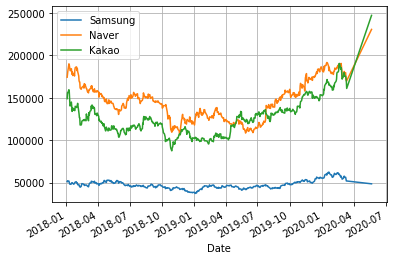

In [8]:
Samsung_stock['Close'].plot(label = 'Samsung')
Naver_stock['Close'].plot(label = 'Naver')
Kakao_stock['Close'].plot(label = 'Kakao')
plt.grid()

plt.legend()
plt.show()